# Passing Networks

Let's try to plot a pass network that would look like this: 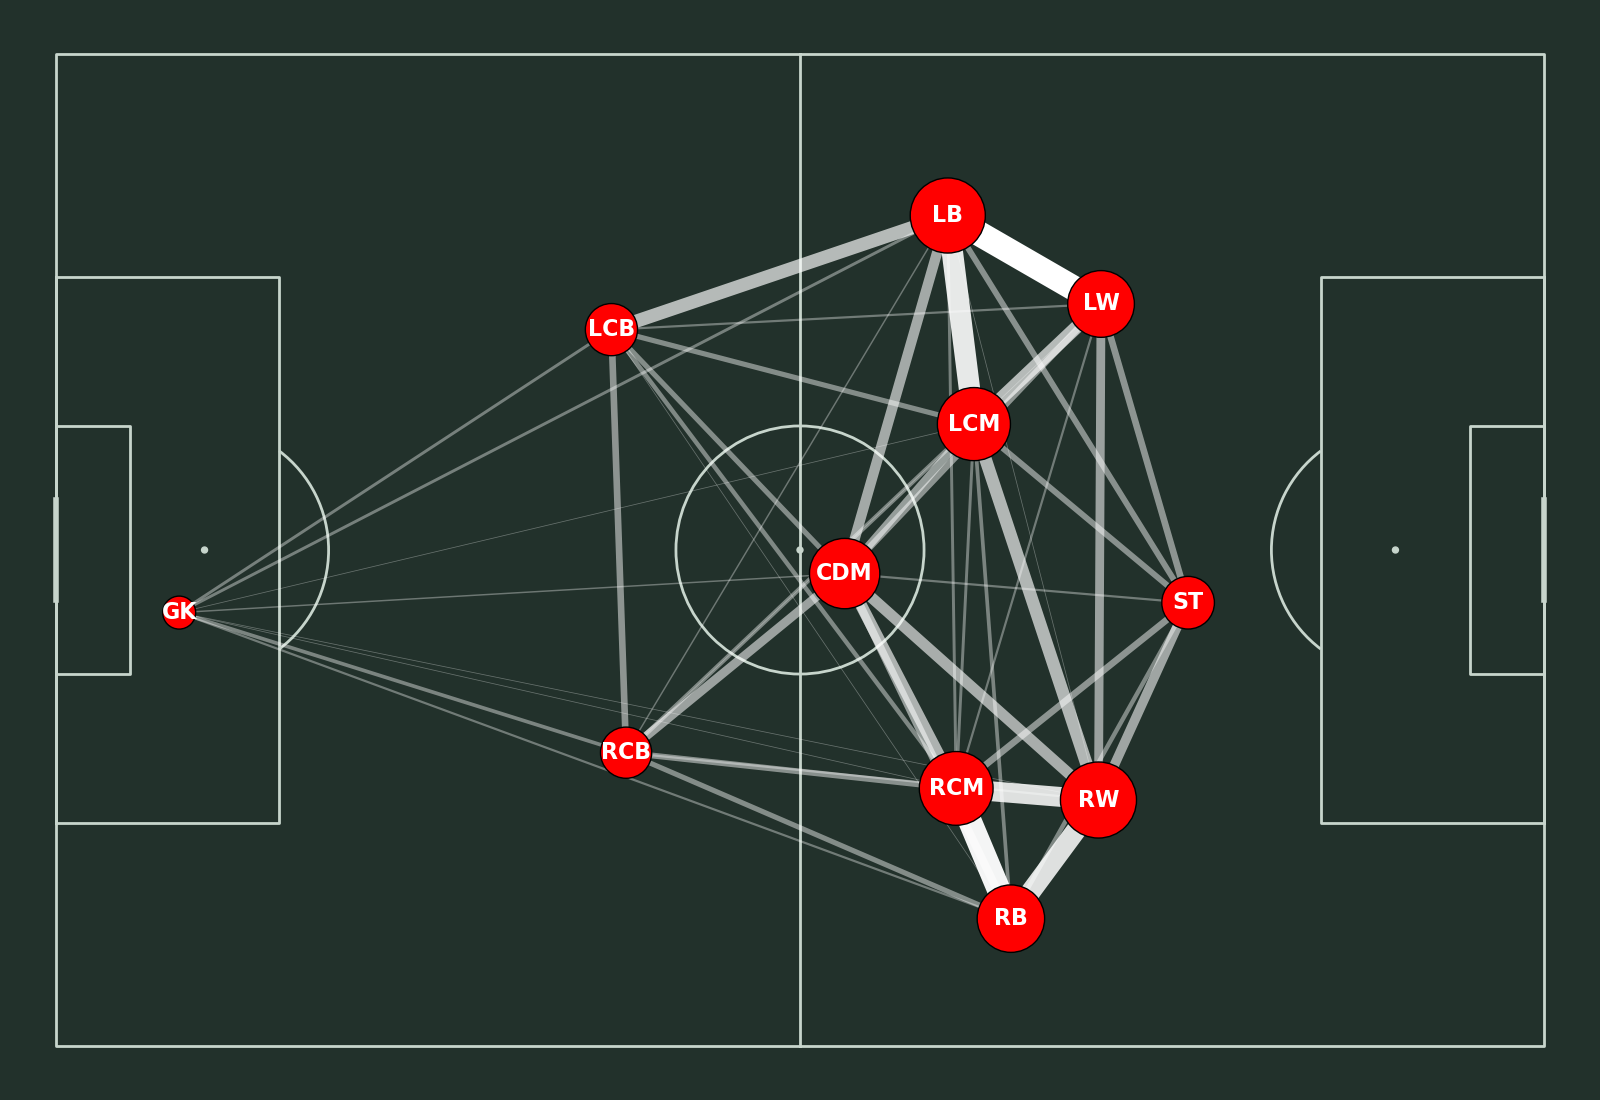

In [2]:
import pandas as pd
import numpy as np
from mplsoccer.pitch import Pitch
from statsbombpy import sb

___First, let's choose a particular match___

In [4]:
comp = sb.competitions()

credentials were not supplied. open data access only


___Decided to check Champions League matches___

In [6]:
ucl = comp[comp['competition_name'] == 'Champions League']

In [8]:
ucl

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,16,4,Europe,Champions League,male,False,False,2018/2019,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-07-09T14:06:05.802
1,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
3,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,26,Europe,Champions League,male,False,False,2014/2015,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
5,16,25,Europe,Champions League,male,False,False,2013/2014,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
6,16,24,Europe,Champions League,male,False,False,2012/2013,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-07-10T13:41:45.751
7,16,23,Europe,Champions League,male,False,False,2011/2012,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
8,16,22,Europe,Champions League,male,False,False,2010/2011,2021-06-22T21:17:46.381,2021-06-13T16:17:31.694,None,2021-06-22T21:17:46.381
9,16,21,Europe,Champions League,male,False,False,2009/2010,2021-06-22T21:24:20.506,2021-06-13T16:17:31.694,None,2021-06-22T21:24:20.506


In [9]:
matches = sb.matches(16,41)

credentials were not supplied. open data access only


In [10]:
matches

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_stage,stadium,referee,data_version,shot_fidelity_version,xy_fidelity_version
0,3750201,2009-05-27,20:45:00.000,Europe - Champions League,2008/2009,Barcelona,Manchester United,2,0,available,scheduled,2021-11-07T14:20:01.699993,2021-06-13T16:17:31.694,1,Final,Stadio Olimpico (Roma),Massimo Busacca,1.1.0,2,2


In [11]:
events = sb.events(3750201)

credentials were not supplied. open data access only


___Focusing on UCL final 2008/2009: Man Utd v FC Barcelona___

In [17]:
utd_barca = events[['team','player', 'pass_recipient', 'type', 'location', 'pass_end_location', 'pass_outcome']]

In [26]:
def get_passes(df):
    df['x'] = [i[0] for i in df['location'].values]
    df['y'] = [i[1] for i in df['location'].values]
    df['endX'] = [i[0] for i in df['pass_end_location'].values]
    df['endY'] = [i[1] for i in df['pass_end_location'].values]

In [18]:
passes = utd_barca[utd_barca['type'] == 'Pass']

In [27]:
passes

,team,player,pass_recipient,type,location,pass_end_location,pass_outcome
6,Barcelona,Andrés Iniesta Luján,Lionel Andrés Messi Cuccittini,Pass,"[61.0, 40.1]","[60.2, 43.4]",NaN
7,Barcelona,Lionel Andrés Messi Cuccittini,Sergio Busquets i Burgos,Pass,"[61.3, 41.1]","[48.4, 40.8]",NaN
8,Barcelona,Sergio Busquets i Burgos,Gnégnéri Yaya Touré,Pass,"[47.1, 40.8]","[33.0, 47.8]",NaN
9,Barcelona,Gnégnéri Yaya Touré,Gerard Piqué Bernabéu,Pass,"[33.0, 47.8]","[26.5, 27.8]",NaN
10,Barcelona,Gerard Piqué Bernabéu,Víctor Valdés Arribas,Pass,"[26.5, 27.8]","[7.9, 35.3]",NaN
...,...,...,...,...,...,...,...
1004,Barcelona,Xavier Hernández Creus,"Samuel Eto""o Fils",Pass,"[105.9, 56.2]","[105.3, 47.0]",NaN
1005,Manchester United,Patrice Evra,NaN,Pass,"[13.4, 28.7]","[16.6, 31.1]",Incomplete
1006,Manchester United,Wayne Mark Rooney,Carlos Alberto Tevez,Pass,"[50.4, 23.5]","[73.4, 1.6]",Out
1007,Barcelona,Carles Puyol i Saforcada,NaN,Pass,"[56.7, 80.0]","[74.2, 74.1]",Unknown


In [28]:
get_passes(passes)

<ipython-input-26-191700970b57>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x'] = [i[0] for i in df['location'].values]
<ipython-input-26-191700970b57>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = [i[1] for i in df['location'].values]
<ipython-input-26-191700970b57>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [30]:
passes = passes.drop(['location', 'pass_end_location'], axis =1)

In [32]:
barca_passes = passes[passes['team'] == 'Barcelona']
utd_passes = passes[passes['team'] == 'Manchester United']

In [23]:
utd_barca['type'].unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt*', 'Carry',
       'Tactical Shift', 'Pressure', 'Foul Committed', 'Foul Won', 'Shot',
       'Goal Keeper', 'Ball Recovery', 'Block', 'Clearance',
       'Dispossessed', 'Duel', 'Interception', 'Dribbled Past', 'Dribble',
       'Miscontrol', 'Injury Stoppage', 'Half End', 'Substitution',
       'Referee Ball-Drop'], dtype=object)

In [24]:
subs = utd_barca[utd_barca['type'] == 'Substitution']

In [25]:
subs

,team,player,pass_recipient,type,location,pass_end_location,pass_outcome
3322,Manchester United,Anderson Luis de Abreu Oliveira,NaN,Substitution,NaN,NaN,NaN
3323,Manchester United,Ji-Sung Park,NaN,Substitution,NaN,NaN,NaN
3324,Barcelona,Thierry Henry,NaN,Substitution,NaN,NaN,NaN
3325,Manchester United,Ryan Giggs,NaN,Substitution,NaN,NaN,NaN
3326,Barcelona,Andrés Iniesta Luján,NaN,Substitution,NaN,NaN,NaN


In [20]:
passes

,team,player,pass_recipient,type,location,pass_end_location,pass_outcome
6,Barcelona,Andrés Iniesta Luján,Lionel Andrés Messi Cuccittini,Pass,"[61.0, 40.1]","[60.2, 43.4]",NaN
7,Barcelona,Lionel Andrés Messi Cuccittini,Sergio Busquets i Burgos,Pass,"[61.3, 41.1]","[48.4, 40.8]",NaN
8,Barcelona,Sergio Busquets i Burgos,Gnégnéri Yaya Touré,Pass,"[47.1, 40.8]","[33.0, 47.8]",NaN
9,Barcelona,Gnégnéri Yaya Touré,Gerard Piqué Bernabéu,Pass,"[33.0, 47.8]","[26.5, 27.8]",NaN
10,Barcelona,Gerard Piqué Bernabéu,Víctor Valdés Arribas,Pass,"[26.5, 27.8]","[7.9, 35.3]",NaN
...,...,...,...,...,...,...,...
1004,Barcelona,Xavier Hernández Creus,"Samuel Eto""o Fils",Pass,"[105.9, 56.2]","[105.3, 47.0]",NaN
1005,Manchester United,Patrice Evra,NaN,Pass,"[13.4, 28.7]","[16.6, 31.1]",Incomplete
1006,Manchester United,Wayne Mark Rooney,Carlos Alberto Tevez,Pass,"[50.4, 23.5]","[73.4, 1.6]",Out
1007,Barcelona,Carles Puyol i Saforcada,NaN,Pass,"[56.7, 80.0]","[74.2, 74.1]",Unknown
